In [11]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [39]:
filepath =  '/content/drive/My Drive/Colab Notebooks/Datasets/DSDP - fifa_cleaned.csv'

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [41]:
data = pd.read_csv(filepath, sep=',')

In [42]:
data.head(50)

,id,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,1987-06-24,31,170.18,72.1,"CF,RW,ST",Argentina,94,...,64+2,61+2,61+2,61+2,64+2,59+2,48+2,48+2,48+2,59+2
1,190460,C. Eriksen,Christian Dannemann Eriksen,1992-02-14,27,154.94,76.2,"CAM,RM,CM",Denmark,88,...,71+3,71+3,71+3,71+3,71+3,66+3,57+3,57+3,57+3,66+3
2,195864,P. Pogba,Paul Pogba,1993-03-15,25,190.50,83.9,"CM,CAM",France,88,...,76+3,77+3,77+3,77+3,76+3,74+3,72+3,72+3,72+3,74+3
3,198219,L. Insigne,Lorenzo Insigne,1991-06-04,27,162.56,59.0,"LW,ST",Italy,88,...,63+3,58+3,58+3,58+3,63+3,58+3,44+3,44+3,44+3,58+3
4,201024,K. Koulibaly,Kalidou Koulibaly,1991-06-20,27,187.96,88.9,CB,Senegal,88,...,73+3,77+3,77+3,77+3,73+3,76+3,85+3,85+3,85+3,76+3
5,203376,V. van Dijk,Virgil van Dijk,1991-07-08,27,193.04,92.1,CB,Netherlands,88,...,78+3,82+3,82+3,82+3,78+3,80+3,86+3,86+3,86+3,80+3
6,231747,K. Mbappé,Kylian Mbappé,1998-12-20,20,152.40,73.0,"RW,ST,RM",France,88,...,66+3,62+3,62+3,62+3,66+3,62+3,54+3,54+3,54+3,62+3
7,153079,S. Agüero,Sergio Leonel Agüero del Castillo,1988-06-02,30,172.72,69.9,ST,Argentina,89,...,58+3,56+3,56+3,56+3,58+3,53+3,47+3,47+3,47+3,53+3
8,167495,M. Neuer,Manuel Neuer,1986-03-27,32,193.04,92.1,GK,Germany,89,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,179813,E. Cavani,Edinson Roberto Cavani Gómez,1987-02-14,32,185.42,77.1,ST,Uruguay,89,...,67+3,65+3,65+3,65+3,67+3,65+3,63+3,63+3,63+3,65+3


In [43]:
data.dtypes

id             int64
name          object
full_name     object
birth_date    object
age            int64
               ...  
LB            object
LCB           object
CB            object
RCB           object
RB            object
Length: 92, dtype: object

In [44]:
data.shape

(17954, 92)

In [45]:
data.isnull().values.any()

True

In [46]:
data.isnull().sum()

id               0
name             0
full_name        0
birth_date       0
age              0
              ... 
LB            2065
LCB           2065
CB            2065
RCB           2065
RB            2065
Length: 92, dtype: int64

In [47]:
# Select only the necessary columns for clustering
df = data[['age', 'height_cm', 'weight_kgs', 'positions', 'nationality']]

# Check for missing values
missing_values = df.isnull().sum()
print("Number of missing values in each column:")
print(missing_values)

Number of missing values in each column:
age            0
height_cm      0
weight_kgs     0
positions      0
nationality    0
dtype: int64


In [48]:
# Create separate LabelEncoder instances for 'positions' and 'nationality'
le_positions = LabelEncoder()
le_nationality = LabelEncoder()

# Fit and transform the columns
df['positions'] = le_positions.fit_transform(df['positions'])
df['nationality'] = le_nationality.fit_transform(df['nationality'])

<ipython-input-48-99313c457671>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['positions'] = le_positions.fit_transform(df['positions'])
<ipython-input-48-99313c457671>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nationality'] = le_nationality.fit_transform(df['nationality'])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

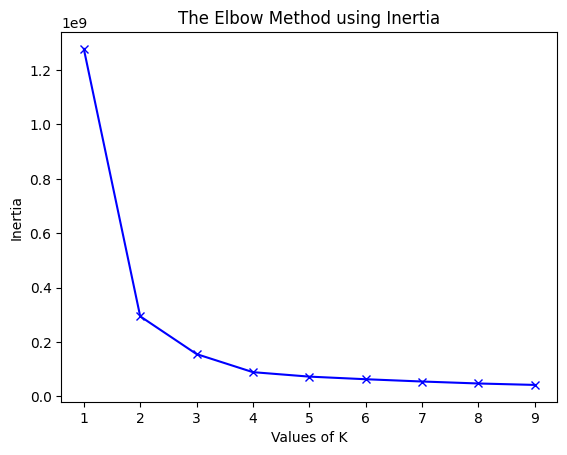

In [49]:
inertias = []

K = range(1, 10)

for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)

    inertias.append(kmeanModel.inertia_)

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [50]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=3) 
df['cluster'] = kmeans.fit_predict(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-50-80294477dc23>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans.fit_predict(df)


In [51]:
# Check the count of data points in each cluster
print(df['cluster'].value_counts())

# Analyze the characteristics of each cluster
for cluster in range(3):
    print(f"Cluster {cluster}")
    print(df[df['cluster'] == cluster].describe())


2    6812
1    5572
0    5570
Name: cluster, dtype: int64
Cluster 0
               age    height_cm   weight_kgs    positions  nationality  \
count  5570.000000  5570.000000  5570.000000  5570.000000  5570.000000   
mean     25.286535   172.233433    74.085117   728.828725    73.119390   
std       4.475642    13.703095     6.655630   109.950994    45.767483   
min      17.000000   152.400000    53.100000   527.000000     1.000000   
25%      22.000000   154.940000    69.900000   620.000000    37.000000   
50%      25.000000   175.260000    73.900000   769.000000    57.000000   
75%      28.000000   182.880000    78.000000   823.000000   119.000000   
max      40.000000   200.660000   110.200000   889.000000   159.000000   

       cluster  
count   5570.0  
mean       0.0  
std        0.0  
min        0.0  
25%        0.0  
50%        0.0  
75%        0.0  
max        0.0  
Cluster 1
               age    height_cm   weight_kgs    positions  nationality  \
count  5572.000000  5572.000

In [52]:
df.head()

,age,height_cm,weight_kgs,positions,nationality,cluster
0,31,170.18,72.1,214,6,1
1,27,154.94,76.2,72,39,1
2,25,190.50,83.9,228,53,2
3,27,162.56,59.0,549,76,0
4,27,187.96,88.9,104,126,1


In [53]:
df['positions'] = le_positions.inverse_transform(df['positions'])
df['nationality'] = le_nationality.inverse_transform(df['nationality'])

<ipython-input-53-e693c5e6bd86>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['positions'] = le_positions.inverse_transform(df['positions'])
<ipython-input-53-e693c5e6bd86>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nationality'] = le_nationality.inverse_transform(df['nationality'])


In [54]:
df.head()

,age,height_cm,weight_kgs,positions,nationality,cluster
0,31,170.18,72.1,"CF,RW,ST",Argentina,1
1,27,154.94,76.2,"CAM,RM,CM",Denmark,1
2,25,190.50,83.9,"CM,CAM",France,2
3,27,162.56,59.0,"LW,ST",Italy,0
4,27,187.96,88.9,CB,Senegal,1


In [55]:
# Check the count of data points in each cluster
print(df['cluster'].value_counts())

# Analyze the characteristics of each cluster
for cluster in range(3):
    print(f"Cluster {cluster}")
    print(df[df['cluster'] == cluster].describe())

2    6812
1    5572
0    5570
Name: cluster, dtype: int64
Cluster 0
               age    height_cm   weight_kgs  cluster
count  5570.000000  5570.000000  5570.000000   5570.0
mean     25.286535   172.233433    74.085117      0.0
std       4.475642    13.703095     6.655630      0.0
min      17.000000   152.400000    53.100000      0.0
25%      22.000000   154.940000    69.900000      0.0
50%      25.000000   175.260000    73.900000      0.0
75%      28.000000   182.880000    78.000000      0.0
max      40.000000   200.660000   110.200000      0.0
Cluster 1
               age    height_cm   weight_kgs  cluster
count  5572.000000  5572.000000  5572.000000   5572.0
mean     25.967157   177.839659    76.713999      1.0
std       4.749911    13.663013     6.865077      0.0
min      17.000000   152.400000    52.200000      1.0
25%      22.000000   170.180000    72.100000      1.0
50%      26.000000   182.880000    77.100000      1.0
75%      29.000000   187.960000    81.200000      1.0
max 

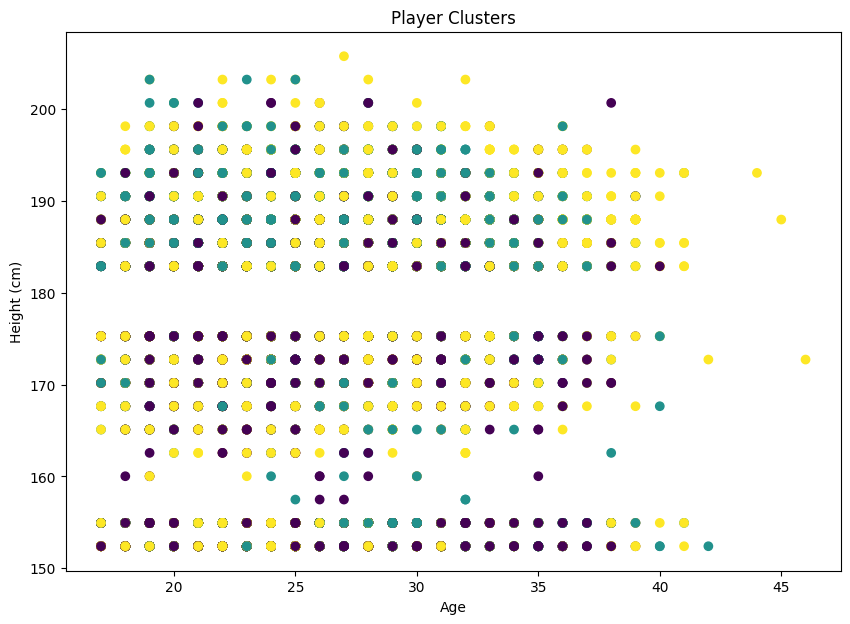

In [56]:
plt.figure(figsize=(10, 7))

# Create a scatter plot of age vs height, colored by cluster assignment
plt.scatter(df['age'], df['height_cm'], c=df['cluster'])

plt.xlabel('Age')
plt.ylabel('Height (cm)')
plt.title('Player Clusters')
plt.show()

<ipython-input-57-088dd49a7439>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans.labels_


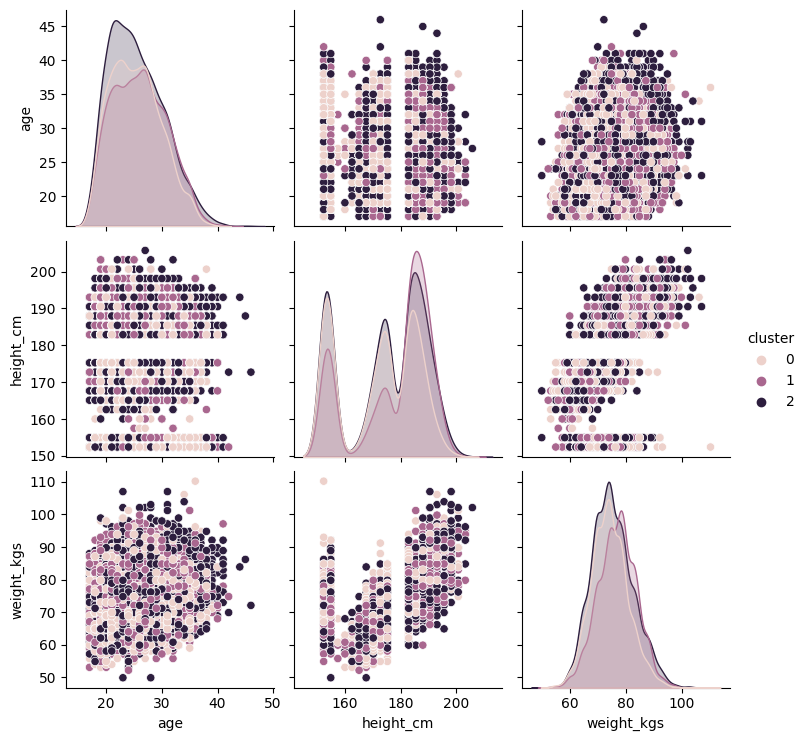

In [57]:

# Add cluster assignments to DataFrame
df['cluster'] = kmeans.labels_

# Create a pairplot colored by cluster ID
sns.pairplot(df[['age', 'height_cm', 'weight_kgs', 'positions', 'nationality', 'cluster']], hue='cluster')

In [ ]:
#First time to do clustering. I dont think, I did this correctly. Looking forward for your feedback sir